In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


# Prepare UV data

In [4]:
df_uv = pd.read_csv("uv_2017_2021.csv")

In [5]:
df_uv

,Unnamed: 0,UV,timestamp,time,day,month
0,0,0,2017-01-01T07:00:00+08:00,07:00,2017-01-01,1
1,1,0,2017-01-01T08:00:00+08:00,08:00,2017-01-01,1
2,2,1,2017-01-01T09:00:00+08:00,09:00,2017-01-01,1
3,3,2,2017-01-01T10:00:00+08:00,10:00,2017-01-01,1
4,4,5,2017-01-01T11:00:00+08:00,11:00,2017-01-01,1
...,...,...,...,...,...,...
21961,21961,1,2021-12-31T15:00:00+08:00,15:00,2021-12-31,12
21962,21962,1,2021-12-31T16:00:00+08:00,16:00,2021-12-31,12
21963,21963,1,2021-12-31T17:00:00+08:00,17:00,2021-12-31,12
21964,21964,0,2021-12-31T18:00:00+08:00,18:00,2021-12-31,12


In [6]:
df_uv.drop(columns="Unnamed: 0", inplace=True)

In [7]:
df_uv['UV'].describe()

count    21966.000000
mean         2.983839
std          3.295917
min         -1.000000
25%          0.000000
50%          2.000000
75%          5.000000
max         15.000000
Name: UV, dtype: float64

#### Remove UV values of '-1' (invalid value) 

In [8]:
df_uv_clean = df_uv.drop(df_uv[df_uv['UV']==-1].index)

#2018_01_13_matchtime = df_2018_01_13_matchtime.drop(df_2018_01_13_matchtime[df_2018_01_13_matchtime["time"]=="08:00"].index)

In [9]:
df_uv_clean['UV'].describe()

count    21943.000000
mean         2.988014
std          3.295118
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max         15.000000
Name: UV, dtype: float64

Text(0.5, 1.0, 'UV over time')

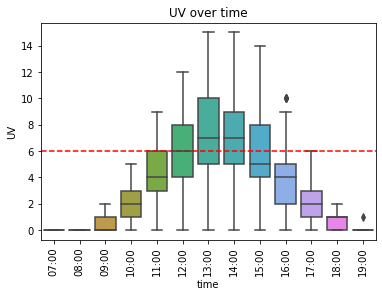

In [10]:
graph = sns.boxplot(data = df_uv_clean, x='time', y='UV')
graph.axhline(6, c="red", linestyle="dashed")
plt.xticks(rotation=90)
plt.title("UV over time")

Text(0.5, 1.0, 'UV over month')

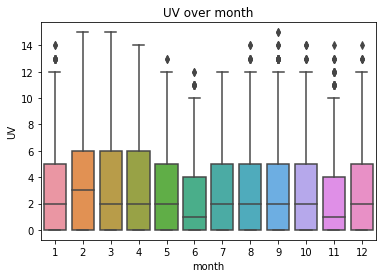

In [11]:
sns.boxplot(data = df_uv_clean, x='month', y='UV')
plt.title("UV over month")

In [12]:
df_uv_clean.to_csv("uv_2017_2021_cleaned.csv")

# Prepare Weather Data

## Read file 

In [41]:
df_temp = pd.read_csv("air_temp.csv")
df_hum = pd.read_csv("rel_humidity.csv")
df_rain = pd.read_csv("rainfall.csv")
df_wind = pd.read_csv("wind-speed.csv")
df_wind_dir = pd.read_csv("wind_dir.csv")

## Create columns for day and time for SQL merging

In [42]:
df_temp['day'] = df_temp['timestamp'].apply(lambda x: x[:10])
df_temp['time'] = df_temp['timestamp'].apply(lambda x: x[11:15]+'0')
df_temp.drop(columns='timestamp', inplace=True)
df_temp.drop(columns="Unnamed: 0", inplace=True)
df_temp.rename(columns = {"air-temperature":"air_temp"}, inplace=True)
df_temp

,station_id,air_temp,day,time
0,S109,26.0,2017-01-01,00:00
1,S117,26.9,2017-01-01,00:00
2,S107,27.0,2017-01-01,00:00
3,S43,26.9,2017-01-01,00:00
4,S108,27.0,2017-01-01,00:00
...,...,...,...,...
633780,S122,29.2,2021-07-21,23:00
633781,S115,29.5,2021-07-21,23:00
633782,S24,29.1,2021-07-21,23:00
633783,S116,29.3,2021-07-21,23:00


In [43]:
df_hum['day'] = df_hum['timestamp'].apply(lambda x: x[:10])
df_hum['time'] = df_hum['timestamp'].apply(lambda x: x[11:15]+'0')
df_hum.drop(columns='timestamp', inplace=True)
df_hum.drop(columns="Unnamed: 0", inplace=True)
df_hum.rename(columns =  {"relative-humidity":"rel_humidity"}, inplace=True)
df_hum

,station_id,rel_humidity,day,time
0,S109,90.6,2017-01-01,00:00
1,S117,82.1,2017-01-01,00:00
2,S107,89.8,2017-01-01,00:00
3,S43,88.1,2017-01-01,00:00
4,S108,87.3,2017-01-01,00:00
...,...,...,...,...
596934,S121,94.8,2021-12-31,23:00
596935,S115,83.3,2021-12-31,23:00
596936,S24,92.3,2021-12-31,23:00
596937,S104,93.8,2021-12-31,23:00


In [44]:
df_rain['day'] = df_rain['timestamp'].apply(lambda x: x[:10])
df_rain['time'] = df_rain['timestamp'].apply(lambda x: x[11:15]+'0')
df_rain.drop(columns='timestamp', inplace=True)
df_rain.drop(columns="Unnamed: 0", inplace=True)
df_rain

,station_id,rainfall,day,time
0,S77,0.0,2017-01-01,00:00
1,S109,0.0,2017-01-01,00:00
2,S117,0.0,2017-01-01,00:00
3,S55,0.0,2017-01-01,00:00
4,S64,0.0,2017-01-01,00:00
...,...,...,...,...
2395233,S69,0.0,2021-08-01,23:00
2395234,S08,0.0,2021-08-01,23:00
2395235,S116,0.0,2021-08-01,23:00
2395236,S104,0.0,2021-08-01,23:00


In [45]:
df_wind['day'] = df_wind['timestamp'].apply(lambda x: x[:10])
df_wind['time'] = df_wind['timestamp'].apply(lambda x: x[11:15]+'0')
df_wind.drop(columns='timestamp', inplace=True)
df_wind.drop(columns="Unnamed: 0", inplace=True)
df_wind.rename(columns =  {"wind-speed":"windspeed"}, inplace=True)
df_wind

,station_id,windspeed,day,time
0,S109,2.1,2017-01-01,00:00
1,S117,2.2,2017-01-01,00:00
2,S50,5.7,2017-01-01,00:00
3,S107,1.3,2017-01-01,00:00
4,S43,2.2,2017-01-01,00:00
...,...,...,...,...
589953,S115,1.4,2021-12-31,23:00
589954,S24,4.8,2021-12-31,23:00
589955,S116,4.6,2021-12-31,23:00
589956,S104,7.1,2021-12-31,23:00


In [46]:
df_wind_dir['day'] = df_wind_dir['timestamp'].apply(lambda x: x[:10])
df_wind_dir['time'] = df_wind_dir['timestamp'].apply(lambda x: x[11:15]+'0')
df_wind_dir.drop(columns='timestamp', inplace=True)
df_wind_dir.drop(columns="Unnamed: 0", inplace=True)
df_wind_dir.rename(columns =  {"wind-direction":"winddir"}, inplace=True)
df_wind_dir

,station_id,winddir,day,time
0,S109,24,2017-01-01,00:00
1,S117,347,2017-01-01,00:00
2,S50,337,2017-01-01,00:00
3,S107,2,2017-01-01,00:00
4,S43,36,2017-01-01,00:00
...,...,...,...,...
575352,S115,84,2017-09-13,23:00
575353,S24,159,2017-09-13,23:00
575354,S116,82,2017-09-13,23:00
575355,S104,139,2017-09-13,23:00


# Install pandasql

In [18]:
!pip install -U pandasql

Requirement already up-to-date: pandasql in c:\users\mag\anaconda3\lib\site-packages (0.7.3)


# Combine Weather Data

In [33]:
from pandasql import sqldf

In [34]:
mysql = lambda q: sqldf(q, globals())

In [47]:
query = '''
SELECT T.*, H.rel_humidity, R.rainfall, W.windspeed, WD.winddir
FROM df_temp as T
INNER JOIN df_hum as H
ON T.day = H.day and T.time = H.time and T.station_id = H.station_id
INNER JOIN df_rain as R
ON T.day = R.day and T.time = R.time and T.station_id = R.station_id
INNER JOIN df_wind as W
ON T.day = W.day and T.time = W.time and T.station_id = W.station_id
INNER JOIN df_wind_dir as WD
ON T.day = WD.day and T.time = WD.time and T.station_id = WD.station_id;
'''

In [48]:
df_all = mysql(query)

In [49]:
df_all

,station_id,air_temp,day,time,rel_humidity,rainfall,windspeed,winddir
0,S109,26.0,2017-01-01,00:00,90.6,0.0,2.1,24
1,S117,26.9,2017-01-01,00:00,82.1,0.0,2.2,347
2,S107,27.0,2017-01-01,00:00,89.8,0.0,1.3,2
3,S43,26.9,2017-01-01,00:00,88.1,0.0,2.2,36
4,S108,27.0,2017-01-01,00:00,87.3,0.0,11.5,356
...,...,...,...,...,...,...,...,...
496429,S122,29.2,2021-07-21,23:00,78.6,0.0,2.6,172
496430,S115,29.5,2021-07-21,23:00,75.3,0.0,4.3,61
496431,S24,29.1,2021-07-21,23:00,73.8,0.0,8.3,176
496432,S116,29.3,2021-07-21,23:00,86.7,0.0,6.3,153


In [56]:
col_temp = df_all.pop("air_temp")
df_all.insert(3, "air_temp", col_temp)
df_all.head()

,station_id,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir
0,S109,2017-01-01,00:00,26.0,90.6,0.0,2.1,24
1,S117,2017-01-01,00:00,26.9,82.1,0.0,2.2,347
2,S107,2017-01-01,00:00,27.0,89.8,0.0,1.3,2
3,S43,2017-01-01,00:00,26.9,88.1,0.0,2.2,36
4,S108,2017-01-01,00:00,27.0,87.3,0.0,11.5,356


In [52]:
df_all['identifier'] = df_all['day'] +"_"+ df_all['time'] +"_"+ df_all['station_id']
df_all.head()

,station_id,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,identifier
0,S109,2017-01-01,00:00,26.0,90.6,0.0,2.1,24,2017-01-01_00:00_S109
1,S117,2017-01-01,00:00,26.9,82.1,0.0,2.2,347,2017-01-01_00:00_S117
2,S107,2017-01-01,00:00,27.0,89.8,0.0,1.3,2,2017-01-01_00:00_S107
3,S43,2017-01-01,00:00,26.9,88.1,0.0,2.2,36,2017-01-01_00:00_S43
4,S108,2017-01-01,00:00,27.0,87.3,0.0,11.5,356,2017-01-01_00:00_S108


In [53]:
df_all.drop_duplicates(subset=['identifier'], keep='last', inplace=True)
df_all

,station_id,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,identifier
0,S109,2017-01-01,00:00,26.0,90.6,0.0,2.1,24,2017-01-01_00:00_S109
1,S117,2017-01-01,00:00,26.9,82.1,0.0,2.2,347,2017-01-01_00:00_S117
2,S107,2017-01-01,00:00,27.0,89.8,0.0,1.3,2,2017-01-01_00:00_S107
3,S43,2017-01-01,00:00,26.9,88.1,0.0,2.2,36,2017-01-01_00:00_S43
4,S108,2017-01-01,00:00,27.0,87.3,0.0,11.5,356,2017-01-01_00:00_S108
...,...,...,...,...,...,...,...,...,...
496429,S122,2021-07-21,23:00,29.2,78.6,0.0,2.6,172,2021-07-21_23:00_S122
496430,S115,2021-07-21,23:00,29.5,75.3,0.0,4.3,61,2021-07-21_23:00_S115
496431,S24,2021-07-21,23:00,29.1,73.8,0.0,8.3,176,2021-07-21_23:00_S24
496432,S116,2021-07-21,23:00,29.3,86.7,0.0,6.3,153,2021-07-21_23:00_S116


In [54]:
df_all.drop(columns="identifier", inplace=True)
df_all

,station_id,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir
0,S109,2017-01-01,00:00,26.0,90.6,0.0,2.1,24
1,S117,2017-01-01,00:00,26.9,82.1,0.0,2.2,347
2,S107,2017-01-01,00:00,27.0,89.8,0.0,1.3,2
3,S43,2017-01-01,00:00,26.9,88.1,0.0,2.2,36
4,S108,2017-01-01,00:00,27.0,87.3,0.0,11.5,356
...,...,...,...,...,...,...,...,...
496429,S122,2021-07-21,23:00,29.2,78.6,0.0,2.6,172
496430,S115,2021-07-21,23:00,29.5,75.3,0.0,4.3,61
496431,S24,2021-07-21,23:00,29.1,73.8,0.0,8.3,176
496432,S116,2021-07-21,23:00,29.3,86.7,0.0,6.3,153


In [75]:
df_all.groupby(['station_id']).size()

station_id
S06      2035
S100    38300
S102     6441
S104    34443
S106    27745
S107    38080
S108    22320
S109    32378
S115    37177
S116    37452
S117    29367
S121     1155
S122    14180
S24     39330
S24B      921
S43     38381
S44     29732
S50     32110
S60     22678
S96      2506
dtype: int64

In [55]:
df_all.to_csv("Weather_combined.csv")

# Get station_id 

In [57]:
df_all['station_id'].unique()

array(['S109', 'S117', 'S107', 'S43', 'S108', 'S06', 'S102', 'S96',
       'S115', 'S24', 'S116', 'S100', 'S106', 'S104', 'S122', 'S44',
       'S121', 'S24B', 'S60', 'S50'], dtype=object)

In [58]:
df_station = pd.read_csv("weather_station.csv")

In [59]:
df_station

,Unnamed: 0,id,device_id,name,long,lat
0,0,S109,S109,Ang Mo Kio Avenue 5,103.84920,1.37640
1,1,S117,S117,Banyan Road,103.67900,1.25600
2,2,S107,S107,East Coast Parkway,103.96250,1.31350
3,3,S43,S43,Kim Chuan Road,103.88780,1.33990
4,4,S108,S108,Marina Gardens Drive,103.87030,1.27990
5,5,S44,S44,Nanyang Avenue,103.68166,1.34583
6,6,S121,S121,Old Choa Chu Kang Road,103.72244,1.37288
7,7,S106,S106,Pulau Ubin,103.96730,1.41680
8,8,S06,S06,S06,103.90070,1.35240
9,9,S102,S102,Semakau Landfill,103.76800,1.18900


In [60]:
df_station.drop(columns="Unnamed: 0", inplace=True)
df_station.drop(columns="id", inplace=True)
df_station.rename(columns={'device_id': 'station_id'}, inplace=True)
df_station

,station_id,name,long,lat
0,S109,Ang Mo Kio Avenue 5,103.84920,1.37640
1,S117,Banyan Road,103.67900,1.25600
2,S107,East Coast Parkway,103.96250,1.31350
3,S43,Kim Chuan Road,103.88780,1.33990
4,S108,Marina Gardens Drive,103.87030,1.27990
5,S44,Nanyang Avenue,103.68166,1.34583
6,S121,Old Choa Chu Kang Road,103.72244,1.37288
7,S106,Pulau Ubin,103.96730,1.41680
8,S06,S06,103.90070,1.35240
9,S102,Semakau Landfill,103.76800,1.18900


# Add station info to weather data

In [61]:
df_all_stat = mysql("SELECT A.*, S.name, S.long as longitude, S.lat as latitude FROM df_all as A LEFT JOIN df_station AS S ON A.station_id=S.station_id;")

In [62]:
df_all_stat

,station_id,day,time,air_temp,rel_humidity,rainfall,windspeed,winddir,name,longitude,latitude
0,S109,2017-01-01,00:00,26.0,90.6,0.0,2.1,24,Ang Mo Kio Avenue 5,103.84920,1.37640
1,S117,2017-01-01,00:00,26.9,82.1,0.0,2.2,347,Banyan Road,103.67900,1.25600
2,S107,2017-01-01,00:00,27.0,89.8,0.0,1.3,2,East Coast Parkway,103.96250,1.31350
3,S43,2017-01-01,00:00,26.9,88.1,0.0,2.2,36,Kim Chuan Road,103.88780,1.33990
4,S108,2017-01-01,00:00,27.0,87.3,0.0,11.5,356,Marina Gardens Drive,103.87030,1.27990
...,...,...,...,...,...,...,...,...,...,...,...
486726,S122,2021-07-21,23:00,29.2,78.6,0.0,2.6,172,Sembawang Road,103.82490,1.41731
486727,S115,2021-07-21,23:00,29.5,75.3,0.0,4.3,61,Tuas South Avenue 3,103.61843,1.29377
486728,S24,2021-07-21,23:00,29.1,73.8,0.0,8.3,176,Upper Changi Road North,103.98260,1.36780
486729,S116,2021-07-21,23:00,29.3,86.7,0.0,6.3,153,West Coast Highway,103.75400,1.28100


In [63]:
df_all_stat.to_csv("Weather_station_combined.csv")

#### Outlier

In [64]:
df_temp

,station_id,air_temp,day,time
0,S109,26.0,2017-01-01,00:00
1,S117,26.9,2017-01-01,00:00
2,S107,27.0,2017-01-01,00:00
3,S43,26.9,2017-01-01,00:00
4,S108,27.0,2017-01-01,00:00
...,...,...,...,...
633780,S122,29.2,2021-07-21,23:00
633781,S115,29.5,2021-07-21,23:00
633782,S24,29.1,2021-07-21,23:00
633783,S116,29.3,2021-07-21,23:00


In [65]:
df_2018_01_13 = df_temp.loc[df_temp["day"]=="2018-01-13"]

In [66]:
df_2018_01_13

,station_id,air_temp,day,time
140185,S109,22.7,2018-01-13,00:00
140186,S117,23.6,2018-01-13,00:00
140187,S50,22.6,2018-01-13,00:00
140188,S107,23.7,2018-01-13,00:00
140189,S43,23.5,2018-01-13,00:00
...,...,...,...,...
140532,S60,22.9,2018-01-13,23:00
140533,S115,23.5,2018-01-13,23:00
140534,S24,22.6,2018-01-13,23:00
140535,S116,23.3,2018-01-13,23:00


In [69]:
df_20180113_S121 = df_2018_01_13.loc[df_2018_01_13["station_id"]=="S121"].reset_index()
df_20180113_S121.drop(columns="index", inplace= True)

In [70]:
df_20180113_S121

,station_id,air_temp,day,time
0,S121,22.9,2018-01-13,01:00
1,S121,25.0,2018-01-13,02:00
2,S121,21.1,2018-01-13,03:00
3,S121,23.7,2018-01-13,04:00
4,S121,22.8,2018-01-13,05:00
5,S121,26.0,2018-01-13,06:00
6,S121,22.4,2018-01-13,07:00
7,S121,19.9,2018-01-13,09:00
8,S121,23.1,2018-01-13,10:00
9,S121,26.1,2018-01-13,11:00


In [71]:
df_2018_01_13_matchtime = df_2018_01_13.drop(df_2018_01_13[df_2018_01_13["time"]=="00:00"].index)
df_2018_01_13_matchtime = df_2018_01_13_matchtime.drop(df_2018_01_13_matchtime[df_2018_01_13_matchtime["time"]=="08:00"].index)
df_2018_01_13_matchtime = df_2018_01_13_matchtime.drop(df_2018_01_13_matchtime[df_2018_01_13_matchtime["time"]=="23:00"].index)

Text(0.5, 1.0, 'Temp for S121 vs other stations')

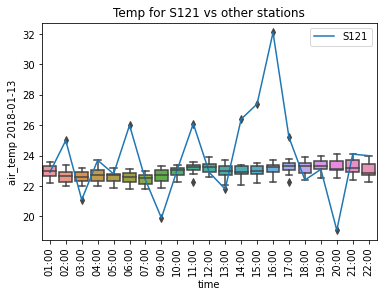

In [73]:
sns.boxplot(x="time", y="air_temp", data=df_2018_01_13_matchtime)
sns.lineplot(x="time", y="air_temp", data=df_20180113_S121, label = "S121")
plt.xticks(rotation=90)
plt.ylabel("air_temp 2018-01-13")
plt.title("Temp for S121 vs other stations")

